# Introduction to Machine Learning with sci-kit learn

Scikit learn is a powerful library for machine learning in Python. It provides a clean, simple and efficient way to implement machine learning algorithms. In this notebook, we will learn how to use scikit learn to implement a simple linear regression model.

Documentation: https://scikit-learn.org/stable/

## Main Tasks of Machine Learning

1. Data Preprocessing
2. Choose a model
3. Train the model
4. Evaluate the model
5. Hyperparameter tuning (optional)
6. Prediction - make predictions on new data
7. Save and load the model
8. Deploy the model in real world

## All Models are Wrong, but Some are Useful

There is a famous quote by George Box - "All models are wrong, but some are useful". This means that no model is perfect. All models are simplifications of the real world. But some models are useful. They help us understand the data and make predictions.

https://en.wikipedia.org/wiki/George_E._P._Box - one of the greatest statisticians of the 20th century

## Types of Models

1. Supervised Learning - We have labeled data - we know the answers to some of the data points
    - Regression
    - Classification
2. Unsupervised Learning - We have unlabeled data - we don't know the answers to any of the data points
    - Clustering - divide the data into clusters by some sort of similarity
    - Dimensionality Reduction - lower the number of features/dimensions
    - Association Rule Learning - find rules that describe large portions of the data

## Types of machine learning algorithms

We have rules based algorithms and model based algorithms.

1. Rules based algorithms - Decision Trees, Random Forests, etc.
2. Model based algorithms - Linear Regression, Logistic Regression, etc.

## What works is no longer called AI

There is another saying in the field of AI - "What works is no longer called AI". This means that once a technology becomes mainstream, it is no longer called AI. For example, in the 1960s, when a computer could play chess, it was called AI. But now, when a computer can play chess

## Deep Learning

Deep learning is a subset of machine learning. It is based on neural networks. It is used for complex problems like image recognition, speech recognition, etc.

In deep learning, we have a lot of data and a lot of features. We use neural networks to learn the patterns in the data.

Deep learning creates a black box model. We don't know how the model is making predictions. We can't interpret the model.


In [1]:
# let's try loading scikit-learn's iris dataset

# Google Colab already includes scikit-learn and other libraries

try:
    import numpy as np
    import pandas as pd
    from sklearn import datasets # includes datasets such as iris, digits, etc.
    from sklearn.model_selection import train_test_split
    # decision tree classifier
    from sklearn.tree import DecisionTreeClassifier
    # matplotlib for plotting
    import matplotlib.pyplot as plt
except ImportError as e:
    print("Modules are missing! {}".format(e))
    # install numpy, pandas, scikit-learn, matplotlib
    print("Please install the required modules using pip")
    print("pip install numpy pandas scikit-learn matplotlib")
    # web pages for all 
    print("https://pypi.org/project/numpy/")
    print("https://pypi.org/project/pandas/")
    print("https://pypi.org/project/scikit-learn/")
    print("https://pypi.org/project/matplotlib/")

## Irises

Irises are flowers. We have a dataset of irises. We have 4 features - sepal length, sepal width, petal length, petal width. We have 3 classes of irises - setosa, versicolor, virginica.

Original dataset by Ronald Fisher in 1936. Link: https://en.wikipedia.org/wiki/Iris_flower_data_set

![Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/440px-Irissetosa1.jpg)

In [2]:
# load the iris dataset
iris = datasets.load_iris()
# what data type is iris?
print(f"Data Type of iris: {type(iris)}")
# description of the dataset
print(iris.DESCR)
# print the feature names
print(iris.feature_names)

Data Type of iris: <class 'sklearn.utils._bunch.Bunch'>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: No

In [3]:
# label details
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
# we can convert the dataset to a pandas dataframe
# create a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# add the target column
df['target'] = iris.target
# sample data
df.sample(5) # random 5 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
47,4.6,3.2,1.4,0.2,0
109,7.2,3.6,6.1,2.5,2
33,5.5,4.2,1.4,0.2,0
92,5.8,2.6,4.0,1.2,1
116,6.5,3.0,5.5,1.8,2


In [5]:
# let's add a category name column based on the target column
df['category'] = df['target'].apply(lambda x: iris.target_names[x])
df.sample(5) # random 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,category
93,5.0,2.3,3.3,1.0,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
15,5.7,4.4,1.5,0.4,0,setosa
89,5.5,2.5,4.0,1.3,1,versicolor
139,6.9,3.1,5.4,2.1,2,virginica


In [7]:
# let's load seaborn as sns for plotting
try:
    import seaborn as sns
except ImportError as e:
    print("Seaborn is missing! {}".format(e))
    # install seaborn
    print("Please install seaborn using pip")
    print("pip install seaborn")
    # web page
    print("https://pypi.org/project/seaborn/")

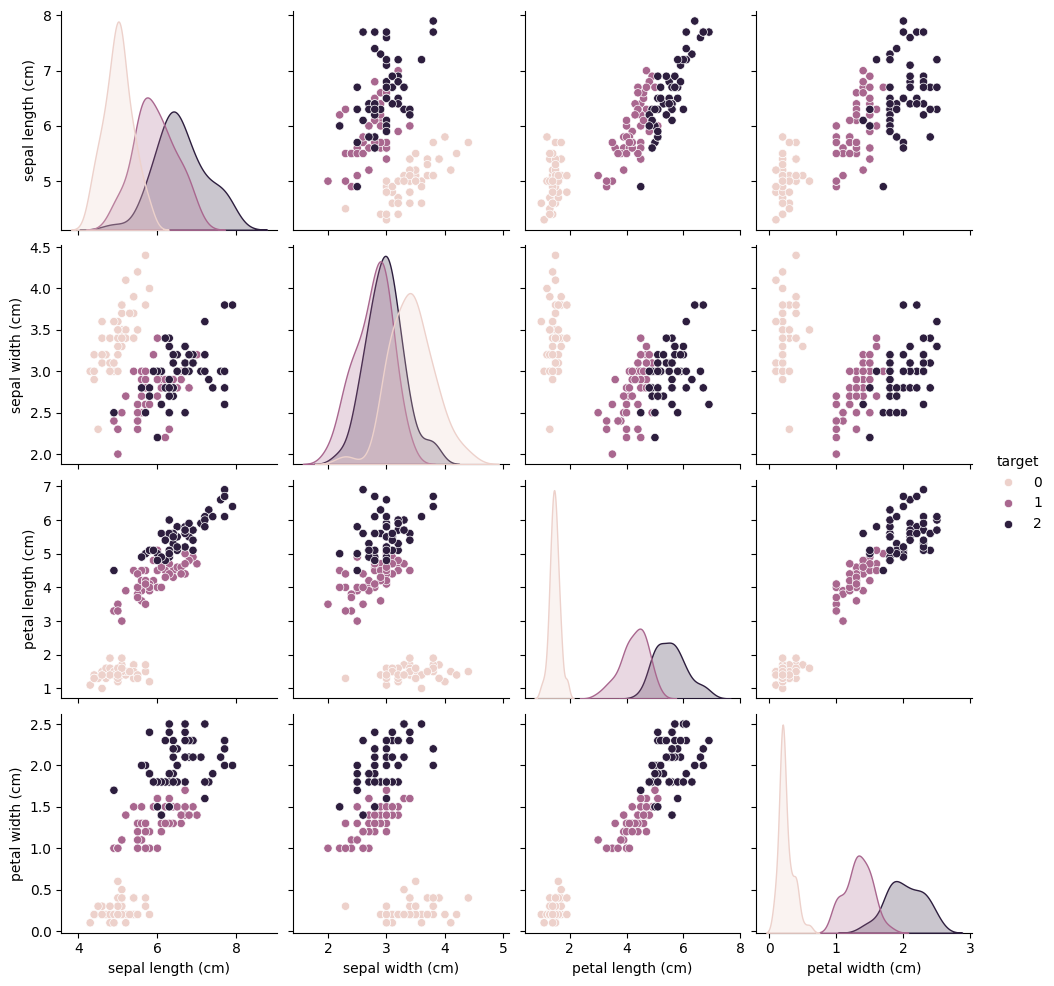

In [8]:
# let's plot cross tabulation so each two features are compared
sns.pairplot(df, hue='target')

In [ ]:
# now let's make a simple decision tree model but first let's split the data
# it is typical to split the data into training and testing sets
# when building a model it is crucial not to test the model on the same data it was trained on
# otherwise we risk overfitting the model

## Splitting the data

It is common to use 80% of the data for training and 20% of the data for testing. We can also use 70% for training and 30% for testing. It also depends on how much data we have. If we have a lot of data, we can use 90% for training and 10% for testing.

In [9]:
# let's use 80 20 split
seed = 2024 # so we get same results each time, using pseudo random number generator
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=seed)
# note the capital X , why?
# X is a matrix of rows of features (here we have 4 features)
# y is a vector of labels (here we have 3 different labels)
# print lengths of the training and testing sets
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_train: 120
Length of X_test: 30
Length of y_train: 120
Length of y_test: 30


In [11]:
# now we can train using some model
# we will use a decision tree classifier
# this is a simple model that is easy to understand
# it has an advantage that it produces a tree that can be visualized

# create the model
model = DecisionTreeClassifier() # using default hyperparameters
# there are many hyperparameters that can be tuned
# docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# train the model
model.fit(X_train, y_train) # fit is often used to train a model
# now we can test the model on the test data
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score}")
# accuracy is the proportion of correctly classified instances
# it is a simple metric but can be misleading in some cases

Model Accuracy: 0.8666666666666667


In [12]:
# how about train set accuracy?
score_train = model.score(X_train, y_train)
print(f"Model Train Accuracy: {score_train}")
# not surprising that the model is better on the training set, but that can be misleading!
# the model could be overfitting the training data

Model Train Accuracy: 1.0


In [14]:
# so now we can feed the model some new data and see what it predicts
# we can use the predict method
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]]) # new flower, note I had to give it as a 2D array
prediction = model.predict(new_flower)
print(f"Model Prediction: {prediction}")

Model Prediction: [0]


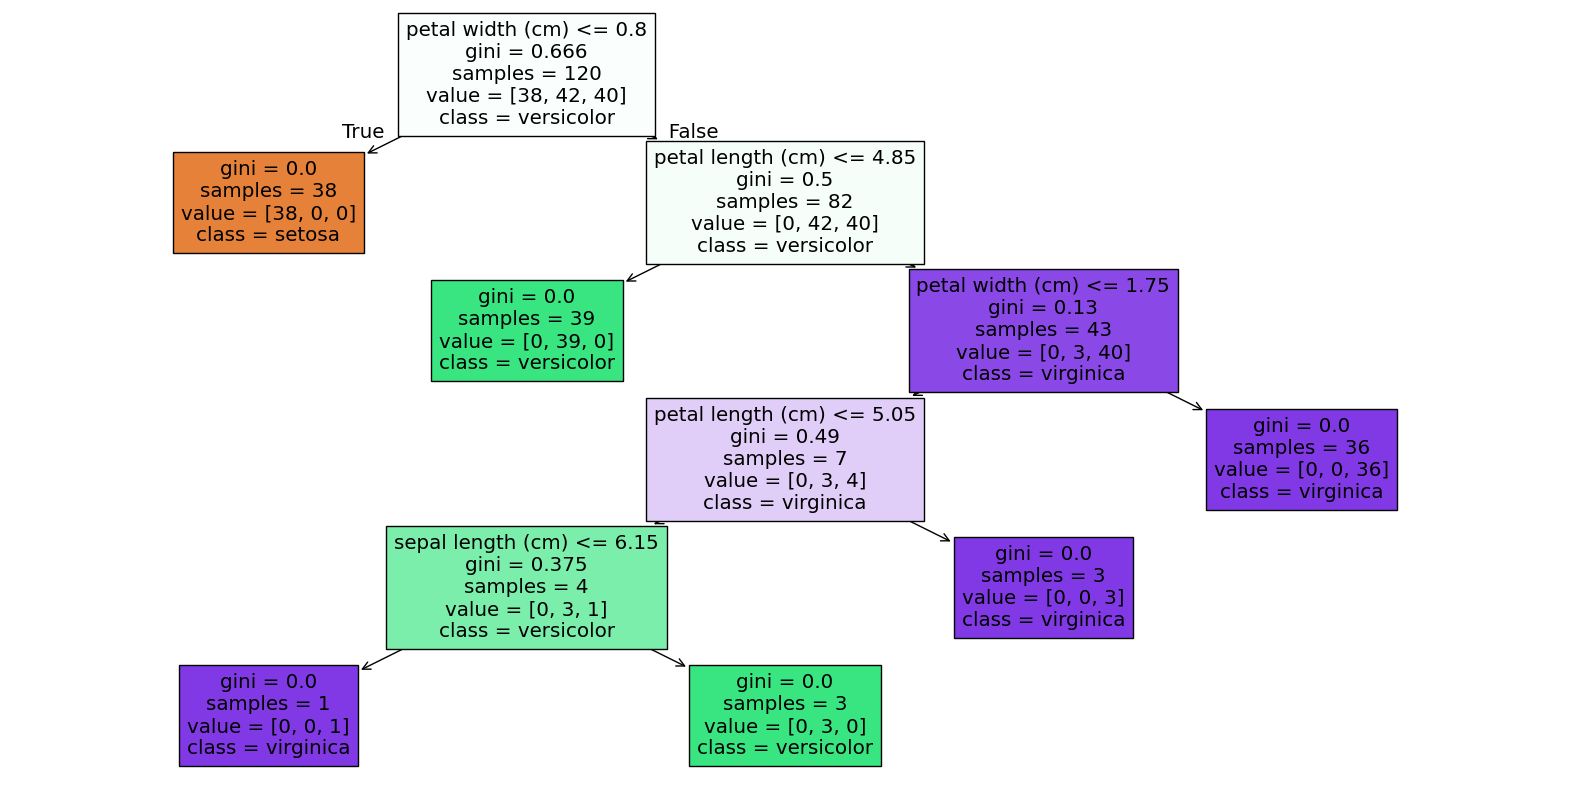

In [15]:
# let's visualize the decision tree
# we can use the plot_tree method

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [16]:
# which flower is that prediction?
print(f"Predicted Flower: {iris.target_names[prediction]}") # 0 index is setosa

Predicted Flower: ['setosa']


## Some takeaways

Machine learning works best when we have a lot of data. It is important to have a lot of data. We can use data augmentation to increase the amount of data.

Machine learning works best when we have a lot of features. We can use feature engineering to create new features.

Machine learning works best when we have a lot of computational power. We can use GPUs to speed up the training process.

Machine learning works best when we have a lot of time. It takes time to train a model. It takes time to evaluate a model. It takes time to tune the hyperparameters of a model. Decision tree is fast model. Random forest is slow model. Neural networks are slow model.

Most time in machine learning is spent on data preprocessing. It is important to clean the data. It is important to remove missing values. It is important to remove outliers. It is important to scale the data. It is important to encode the data. It is important to split the data.

To learn more about machine learning, I recommend "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron. It is a great book for beginners.

Link: https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1098125975